In [19]:
# Imports libraries
library(tidyverse)
library(ggplot2)

In [20]:
# Reads in data from csv file
daily_activity <- read_csv('Resources/dailyActivity_merged.csv')

Parsed with column specification:
cols(
  Id = col_double(),
  ActivityDate = col_character(),
  TotalSteps = col_double(),
  TotalDistance = col_double(),
  TrackerDistance = col_double(),
  LoggedActivitiesDistance = col_double(),
  VeryActiveDistance = col_double(),
  ModeratelyActiveDistance = col_double(),
  LightActiveDistance = col_double(),
  SedentaryActiveDistance = col_double(),
  VeryActiveMinutes = col_double(),
  FairlyActiveMinutes = col_double(),
  LightlyActiveMinutes = col_double(),
  SedentaryMinutes = col_double(),
  Calories = col_double()
)


In [33]:
# Creates dataframe with a subset of the data for plotting
range = length(daily_activity$ActivityDate)
days = 1:range

daily_distance <- data.frame(days, daily_activity$TotalDistance)
daily_distance <- rename(daily_distance, Day = days, Distance = daily_activity.TotalDistance)
head(daily_distance)

Day,Distance
1,8.50
2,6.97
3,6.74
4,6.28
5,8.16
6,6.48


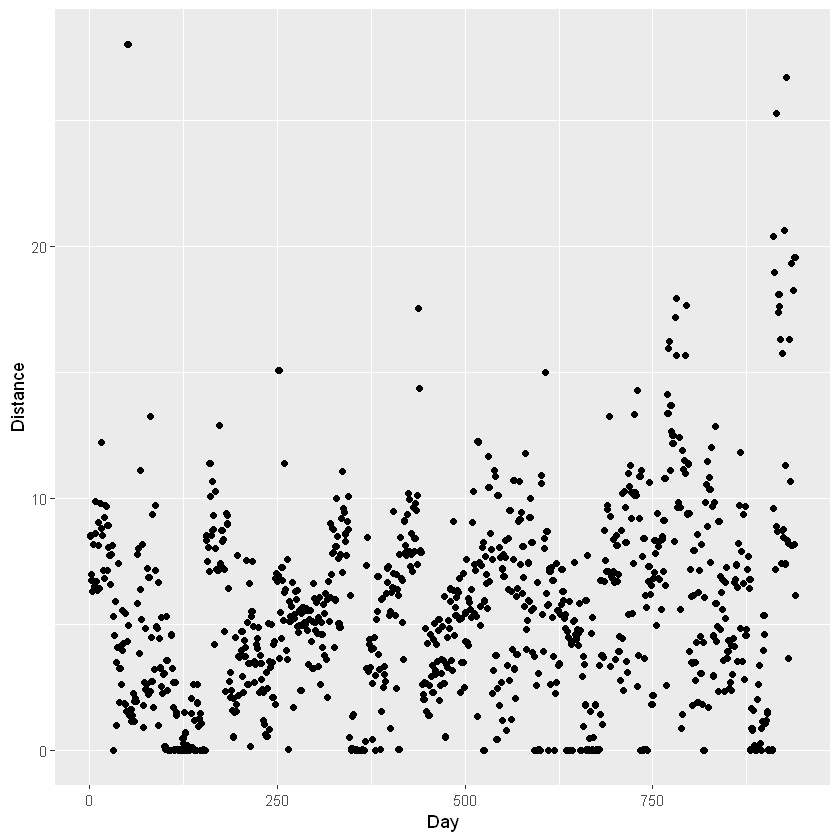

In [35]:
# Plots Distance covered each Day in a scatter plot
ggplot(data = daily_distance, aes(x = Day, y = Distance)) +
    geom_point() +
    geom_jitter()

In [89]:
# Creates two more dataframes for other plots
total <- mean(daily_activity$TotalDistance)
tracker <- mean(daily_activity$TrackerDistance)
logged <- mean(daily_activity$LoggedActivitiesDistance)

track_log_df <- data.frame(
    Type = c('Tracked','Logged', 'Total'),
    Average = c(tracker, logged, total)
)

very <- mean(daily_activity$VeryActiveDistance)
moderately <- mean(daily_activity$ModeratelyActiveDistance)
lightly <- mean(daily_activity$LightActiveDistance)
sedentary <- mean(daily_activity$SedentaryActiveDistance)

level_df <- data.frame(
    Type = c('Sedentary', 'Lightly', 'Moderately', 'Very', 'Total'),
    Average = c(sedentary, lightly, moderately, very, total)
)

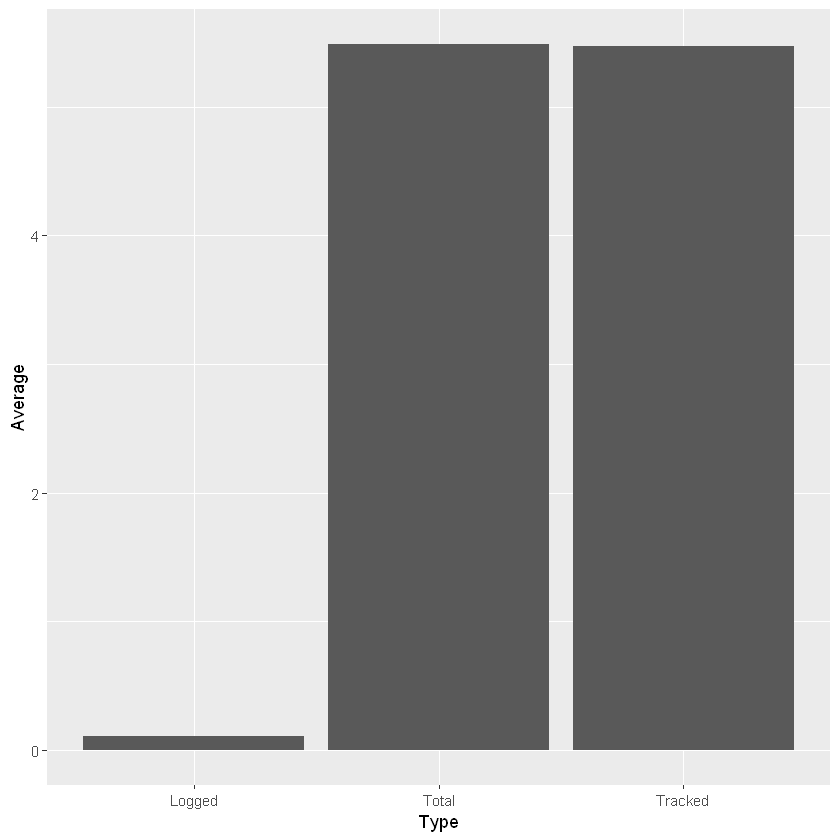

In [88]:
ggplot(data = track_log_df, aes(x = Type, y = Average)) +
        geom_bar(stat = 'identity')

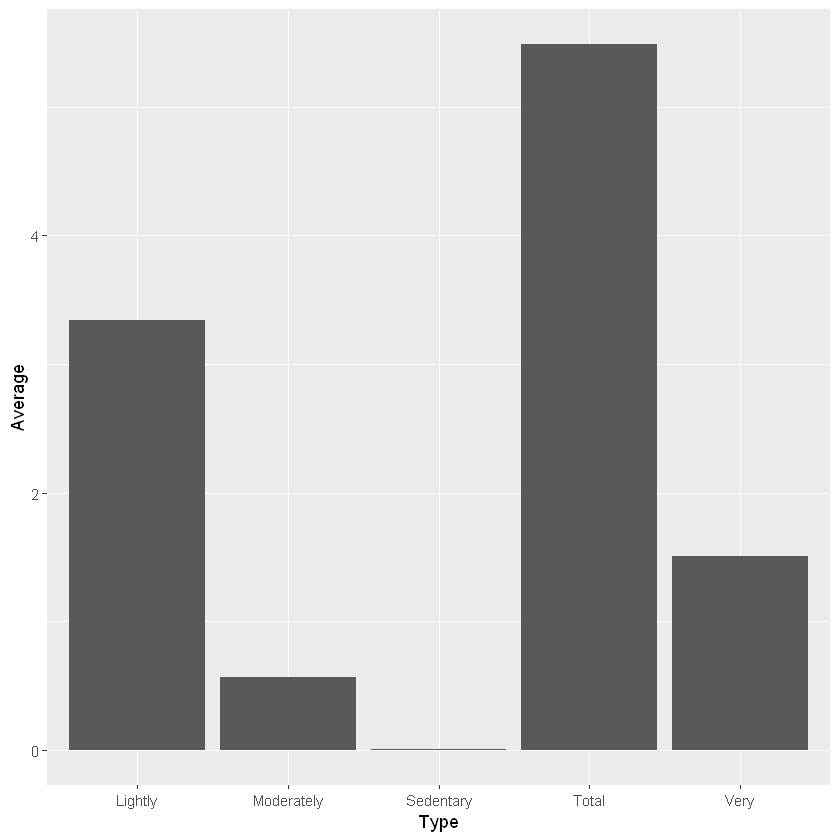

In [90]:
ggplot(data = level_df, aes(x = Type, y = Average)) +
        geom_bar(stat = 'identity')